In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
history = []
y_pred = []
y_truth = []

for i in tqdm.tqdm(range(6)):
    hist = np.load(f"../data/history_final_model_fold{i}.npy", allow_pickle=True).item()
    y_p = np.load(f"../data/y_pred_final_fold{i}.npy")
    y_t = np.load(f"../data/y_true_final_fold{i}.npy")

    history.append(hist)
    y_pred.append(y_p)
    y_truth.append(y_t)

100%|██████████| 6/6 [00:00<00:00, 812.80it/s]


In [3]:
history = np.array(history)
print(history[0].keys())

dict_keys(['AUC', 'Precision', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_accuracy', 'val_loss'])


In [5]:
losses = np.zeros(22)
val_losses = np.zeros(22)
precision = np.zeros(22)
val_precision = np.zeros(22)

for i in range(6):
    losses = np.concatenate([losses, np.array(history[i]["loss"][:22])])
    val_losses = np.concatenate([val_losses, np.array(history[i]["val_loss"][:22])])
    precision = np.concatenate([precision, np.array(history[i]["Precision"][:22])])
    val_precision = np.concatenate([val_precision, np.array(history[i]["val_Precision"][:22])])

In [ ]:
mean_loss

In [22]:
losses = np.reshape(losses, (7, 22))
val_losses = np.reshape(val_losses, (7, 22))
precision = np.reshape(precision, (7, 22))
val_precision = np.reshape(val_precision, (7, 22))

losses = np.delete(losses, 0, axis=0)
val_losses = np.delete(val_losses, 0, axis=0)
precision = np.delete(precision, 0, axis=0)
val_precision = np.delete(val_precision, 0, axis=0)

mean_losses = np.mean(losses, axis=0)
mean_val_losses = np.mean(val_losses, axis=0)
mean_precision = np.mean(precision, axis=0)
mean_val_precision = np.mean(val_precision, axis=0)


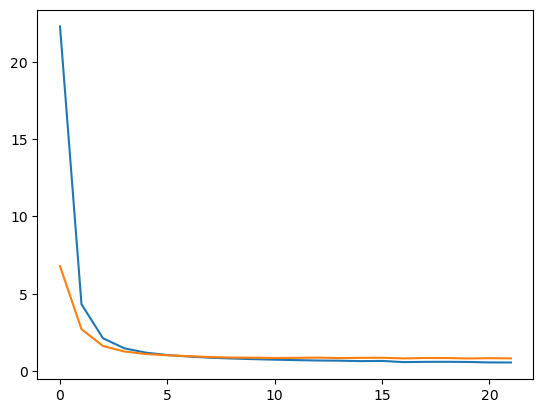

In [23]:
plt.plot(mean_losses, label="loss")
plt.plot(mean_val_losses, label="val_loss")

[[0.58348626 0.6844703  0.72727275 0.77495724 0.81407517 0.85163802
  0.86685288 0.87862176 0.89764082 0.90890241 0.91969776 0.9263413
  0.93524539 0.93994647 0.94048226 0.95105249 0.95599949 0.95966113
  0.95772338 0.96096212 0.96888387 0.96409225]
 [0.59603822 0.68320942 0.73141193 0.77811199 0.81713027 0.85102671
  0.87109995 0.88808805 0.89842838 0.91177231 0.91842514 0.92735642
  0.93241698 0.93853188 0.94720185 0.94547063 0.95509738 0.95387524
  0.9636066  0.95813894 0.96816808 0.96782303]
 [0.60838407 0.68568444 0.74281371 0.78275859 0.81985444 0.84350634
  0.86264169 0.88465565 0.89199692 0.91358346 0.91523248 0.92846233
  0.93316358 0.94295853 0.93843615 0.9476347  0.95784956 0.9581337
  0.96074718 0.96245909 0.96390843 0.97005534]
 [0.5771572  0.69209528 0.74098408 0.79556125 0.82472122 0.85031462
  0.87343603 0.89614284 0.90519917 0.91063613 0.92386305 0.92739779
  0.93675387 0.94393826 0.94976592 0.94514126 0.96411484 0.96088821
  0.95916826 0.96569985 0.96394473 0.96589911

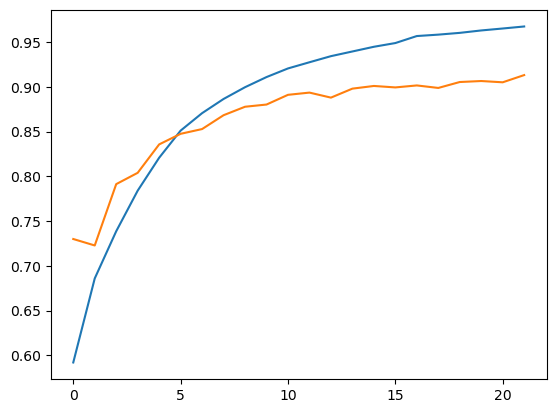

In [24]:
print(precision)
plt.plot(mean_precision, label="precision")
plt.plot(mean_val_precision, label="val_precision")